# Projeto 1 - Ciência dos Dados
___

## Introdução da organização:

**European Atomic Energy Community (EAEC ou Euratom)** é uma organização internacional criada pelo Tratado Euratom em 25 de Março de 1957 com o objetivo inicial de criar um mercado especializado para a energia nuclear na Europa, desenvolvendo energia nuclear e distribuindo-a aos seus Estados-Membros e vendendo o excedente a estados não membros. No entanto, ao longo dos anos, o seu âmbito foi consideravelmente aumentado para abranger uma grande variedade de áreas associadas à energia nuclear e radiações ionizantes, assim como garantir que materiais nucleares e radiações sejam armazenadas de forma segura. Também auxilia na construção do ITER (International Thermonuclear Experimental Reactor) que é um projeto de reator experimental considerado a próxima fase na evolução da energia nuclear.

## Pergunta (s) a ser respondida:

**Pergunta:** Países que fazem parte da EAEC possuem menos gastos e baixa no cosumo de petróleo do que os que não fazem?


## Explicação da hipótese e mecanismo:

**Hipótese :** Com o aumento do uso de energia nuclear, os países participantes passam a fazer mais uso dessa energia diminuindo o consumo de petróleo, que é a fonte de energia mais utilizada no resto do planeta.

**Mecanismo:** Com o desenvolvimento do mercado de energia nuclear os países que produzem mais do que consomem acabam destribuindo para os estados membros que necessitam, assim, tanto os que produzem quanto os que consomem acabam necessitando cada vez menos do petróleo para gerar energia obtendo uma baixa no seu consumo.

## Bases de dados usadas:

Dados da **produção de energia nuclear** foi retirado do The World Bank. 

Dados do **consumo e produção de petróleo** foram retirados do site da BP (British Petroleum), que é uma empresa multinacional sediada no Reino Unido que opera no setor de energia.

Dados do **PIB mundial** retirados do Gapminder

In [359]:
%matplotlib inline
import pandas as pd
import numpy as np
import math as math
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns

In [360]:
prod_nuclear = pd.read_excel('nuclear_power_generation_total.xlsx')
consumo_oil = pd.read_excel('oil_consumption_total.xlsx')
prod_oil = pd.read_excel('oil_production_total.xlsx')
gdp_ppp = pd.read_excel('total_gdp_ppp_inflation_adjusted.xlsx')

## Análise de dados:

### Produção de energia nuclear dos participantes da EAEC

In [361]:
quali=prod_nuclear
paises_na_EAEC = []
paises_EAEC = ['Belgium','Bulgaria','Lithuania','Netherlands','Finland','Romania','France','Slovak Republic', 'Germany','Slovenia', 'Spain', 'Hungary','Sweden', 'United Kingdom']
for pais in quali ["country"]:
    if pais in paises_EAEC:
        paises_na_EAEC.append("sim")
    else:
        paises_na_EAEC.append('não')
quali["Está na EAEC"]=paises_na_EAEC
a=quali.set_index('country')
e=a.iloc[:,52:]
e

,Está na EAEC
country,
Argentina,não
Armenia,não
Belgium,sim
Brazil,não
Bulgaria,sim
Canada,não
China,não
Czech Republic,não
Finland,sim


In [362]:
prod_nuclear
prod_nuclear_anos = prod_nuclear.set_index('country')
linhas = ['Belgium','Bulgaria','Lithuania','Netherlands','Finland','Romania','France','Slovak Republic', 'Germany','Slovenia', 'Spain', 'Hungary','Sweden', 'United Kingdom']
colunas = [1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010]
producao_nuclear95_ue =prod_nuclear_anos.loc[linhas, colunas]
x=producao_nuclear95_ue.sort_values(by=2010, ascending=False)
# x.describe()
x

,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010
country,,,,,,,,,,,,,,,,
France,32400000.0,34200000.0,34000000.0,33400000.0,33900000.0,35700000.0,36200000.0,37600000.0,37900000.0,38500000.0,38800000.0,38700000.0,37800000.0,37800000.0,35200000.0,36900000.0
Germany,13200000.0,13800000.0,14700000.0,13900000.0,14600000.0,14600000.0,14700000.0,14200000.0,14200000.0,14400000.0,14000000.0,14400000.0,12100000.0,12800000.0,11600000.0,12100000.0
United Kingdom,7650000.0,8140000.0,8440000.0,8550000.0,8180000.0,7310000.0,7750000.0,7550000.0,7630000.0,6880000.0,7020000.0,6490000.0,5420000.0,4510000.0,5940000.0,5340000.0
Spain,4770000.0,4840000.0,4760000.0,5070000.0,5060000.0,5350000.0,5480000.0,5420000.0,5320000.0,5470000.0,4950000.0,5170000.0,4740000.0,5070000.0,4540000.0,5330000.0
Sweden,6010000.0,6390000.0,6010000.0,6330000.0,6290000.0,4930000.0,6200000.0,5860000.0,5800000.0,6660000.0,6220000.0,5760000.0,5760000.0,5490000.0,4490000.0,4970000.0
Belgium,3560000.0,3730000.0,4080000.0,3970000.0,4220000.0,4140000.0,3990000.0,4070000.0,4070000.0,4070000.0,4090000.0,4010000.0,4150000.0,3920000.0,4060000.0,4120000.0
Finland,1650000.0,1680000.0,1800000.0,1880000.0,1980000.0,1930000.0,1960000.0,1920000.0,1960000.0,1950000.0,2000000.0,1970000.0,2010000.0,1970000.0,2020000.0,1960000.0
Hungary,1210000.0,1220000.0,1200000.0,1200000.0,1210000.0,1220000.0,1220000.0,1200000.0,947000.0,1030000.0,1190000.0,1160000.0,1260000.0,1270000.0,1330000.0,1360000.0
Bulgaria,1480000.0,1560000.0,1530000.0,1450000.0,1360000.0,1560000.0,1680000.0,1740000.0,1490000.0,1450000.0,1600000.0,1680000.0,1260000.0,1360000.0,1310000.0,1310000.0


In [363]:
# media_nuclear_prod_eaec=x.mean()
# tabela_media= pd.DataFrame(data=media_nuclear_prod_eaec, columns = ['Media produção nuclear países EAEC'])
# tabela_media
# # x.describe()
#Fazer calculo da média não faz sentido para os valores dos meus dados!

In [364]:
# tabela_media.plot()

In [365]:
mediana_nuclear_prod_eaec=x.median()
tabela_mediana_= pd.DataFrame(data=mediana_nuclear_prod_eaec, columns = ['Mediana da produção nuclear dos países da EAEC'])
tabela_mediana_
# x.describe()

,Mediana da produção nuclear dos países da EAEC
1995,1650000.0
1996,1620000.0
1997,1665000.0
1998,1665000.0
1999,1670000.0
2000,1745000.0
2001,1820000.0
2002,1830000.0
2003,1750000.0
2004,1705000.0


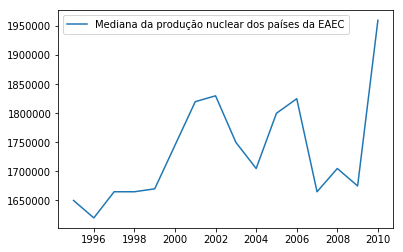

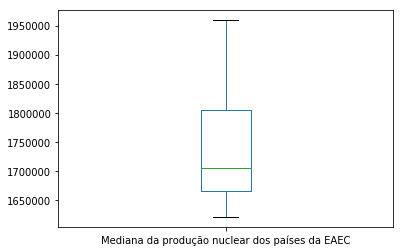

In [366]:
tabela_mediana_.plot()
tabela_mediana_.plot.box()

Queda nos valores de 2005 são consequência de acidentes envolvendo usinas no Reino Unido e Belgica. Já as quedas de 2006 são reflexo de outros dois acidentes que ocorreram nas usinas da Belgica e Suécia.

In [367]:
# tabela_mediana.plot.box()

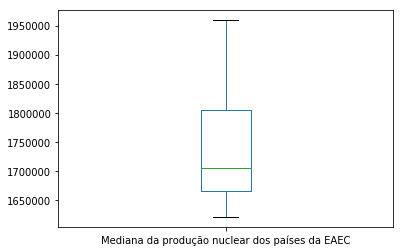

In [368]:
tabela_mediana_.plot.box()

### Produção de energia nuclear dos países fora da EAEC

In [369]:
prod_nuclear_anos_neaec = prod_nuclear.set_index('country')
linhass = ['United States', 'South Korea', 'Japan', 'Canada', 'Switzerland', 'Mexico', 'Argentina', 'Armenia', 'Brazil', 'China', 'Pakistan', 'Russia', 'South Africa', 'Ukraine']
colunass = [1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010]
producao_nuclear95_nue =prod_nuclear_anos.loc[linhass, colunass]
z=producao_nuclear95_nue.sort_values(by=2010, ascending=False)
# z.describe()
z
#Para uma comaração mais justa retirei um país dos "fora da organização" disponível nos dados.

,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010
country,,,,,,,,,,,,,,,,
United States,61400000.0,61500000.0,57300000.0,61400000.0,66400000.0,68600000.0,68200000.0,69200000.0,67700000.0,69900000.0,69700000.0,70200000.0,71900000.0,72000000.0,71400000.0,72100000.0
Japan,25000000.0,26000000.0,27400000.0,28600000.0,27200000.0,27700000.0,27500000.0,25400000.0,20600000.0,24300000.0,26200000.0,26100000.0,22700000.0,22200000.0,24100000.0,24800000.0
Russia,8560000.0,9380000.0,9330000.0,9060000.0,10500000.0,11200000.0,11800000.0,12200000.0,12900000.0,12400000.0,12900000.0,13500000.0,13800000.0,14000000.0,14100000.0,14700000.0
South Korea,5760000.0,6360000.0,6630000.0,7710000.0,8860000.0,9370000.0,9640000.0,10200000.0,11200000.0,11200000.0,12600000.0,12800000.0,12300000.0,13000000.0,12700000.0,12800000.0
Canada,8410000.0,7980000.0,7100000.0,6150000.0,6320000.0,6260000.0,6600000.0,6490000.0,6440000.0,7770000.0,7910000.0,8420000.0,8040000.0,8080000.0,7750000.0,7800000.0
Ukraine,6060000.0,6840000.0,6830000.0,6470000.0,6200000.0,6650000.0,6550000.0,6710000.0,7000000.0,7480000.0,7630000.0,7760000.0,7960000.0,7730000.0,7130000.0,7670000.0
China,1100000.0,1230000.0,1240000.0,1210000.0,1290000.0,1440000.0,1500000.0,2160000.0,3730000.0,4340000.0,4570000.0,4720000.0,5340000.0,5880000.0,6030000.0,6350000.0
Switzerland,2140000.0,2160000.0,2190000.0,2220000.0,2220000.0,2270000.0,2310000.0,2340000.0,2360000.0,2320000.0,2010000.0,2390000.0,2400000.0,2380000.0,2380000.0,2270000.0
Brazil,217000.0,209000.0,273000.0,281000.0,342000.0,520000.0,1230000.0,1190000.0,1150000.0,998000.0,847000.0,1180000.0,1060000.0,1200000.0,1110000.0,1250000.0


In [370]:
# media_nuclear_prod_n_eaec=z.mean()
# tabela_mediaa= pd.DataFrame(data=media_nuclear_prod_n_eaec, columns = ['Media da produção nuclear países fora da EAEC'])
# tabela_mediaa
#Fazer calculo da média não faz sentido para os valores dos meus dados!

In [371]:
mediana_nuclear_prod_n_eaec=z.median()
tabela_mediana= pd.DataFrame(data=mediana_nuclear_prod_n_eaec, columns = ['Mediana da produção nuclear dos países fora da EAEC'])
tabela_mediana
# z.describe()
# tabela_mediana_

,Mediana da produção nuclear dos países fora da EAEC
1995,1620000.0
1996,1695000.0
1997,1715000.0
1998,1715000.0
1999,1755000.0
2000,1855000.0
2001,1905000.0
2002,2250000.0
2003,3045000.0
2004,3330000.0


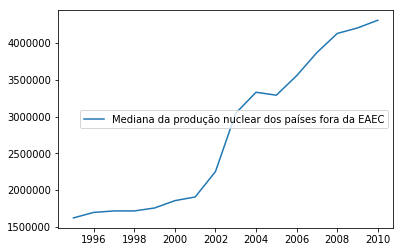

In [372]:
tabela_mediana.plot()

[Text(0, 0, 'dentro'), Text(0, 0, 'fora')]

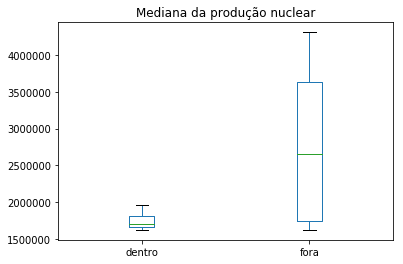

In [427]:
paises_fora=tabela_mediana
paises_dentro=tabela_mediana_

box2 = paises_dentro.join(paises_fora)
box2.plot.box()
plt.title('Mediana da produção nuclear')
plt.gca().set_xticklabels(['Dentro', 'Fora'])
plt.ylabel
# box3 = box2.boxplot(column=['Mediana da produção nuclear dos países da EAEC', 'Mediana da produção nuclear dos países fora da EAEC'])

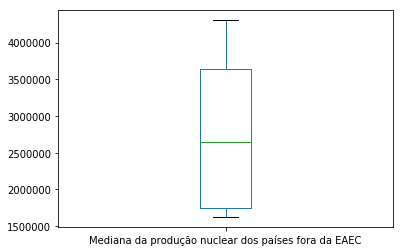

In [374]:
tabela_mediana.plot.box()

### Consumo de petróleo dos países participantes da EAEC

In [434]:
consumo_oil

          #['Belgium','Bulgaria','Lithuania','Netherlands','Finland','Romania','France','Slovak Republic', 'Germany','Slovenia', 'Spain', 'Hungary','Sweden', 'United Kingdom']
linhasss = ['Belgium','Bulgaria','Finland','Romania','France','Hungary','Lithuania','Netherlands','Slovak Republic','Spain','Sweden', 'United Kingdom','Denmark','Greece']
colunasss = [1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010]
consumo_oil95_ue =consumo_oil_anos.loc[linhasss, colunasss]
y=consumo_oil95_ue.sort_values(by=2010, ascending=False)
y
# linhasss = ['Austria','Belgium','Bulgaria','Czech Republic','Denmark','Finland','Romania','France','Greece','Hungary','Ireland','Lithuania','Netherlands','Poland','Portugal','Slovak Republic','Spain','Sweden', 'United Kingdom']


,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010
country,,,,,,,,,,,,,,,,
France,89000000,91000000,91700000,95000000,96400000,94900000,95500000,92900000,93100000,94000000,93100000,93000000,91400000,90800000,87500000,84500000
United Kingdom,82200000,84200000,81700000,81200000,79900000,78800000,78700000,78200000,78700000,81000000,83800000,83200000,80700000,79500000,75800000,74900000
Spain,57500000,59100000,61600000,66700000,69000000,69900000,73000000,73700000,76200000,78500000,79300000,79300000,80300000,78000000,73500000,72100000
Netherlands,38700000,38300000,40300000,40500000,41500000,42700000,44800000,44700000,45100000,47100000,50100000,50800000,50700000,47300000,45900000,45900000
Belgium,27700000,30200000,31000000,31300000,30100000,30900000,31000000,31700000,33700000,33700000,33600000,33800000,34600000,36000000,31500000,32700000
Greece,16600000,17400000,17700000,18600000,18000000,18900000,19300000,19400000,20300000,20100000,20100000,21300000,21400000,20400000,19500000,18100000
Sweden,17100000,18500000,17100000,17200000,17100000,15900000,16000000,16500000,17700000,17500000,17200000,17300000,16900000,16700000,15500000,16200000
Finland,10200000,10400000,10300000,10800000,10900000,10900000,10700000,11100000,11500000,10700000,11100000,10700000,10800000,10700000,10100000,10600000
Romania,13500000,13000000,13700000,12000000,9480000,9980000,10600000,10600000,9430000,10900000,10500000,10300000,10300000,10400000,9190000,8750000


In [376]:
mediana_nuclear_cons_eaec=y.median()
tabela_medianaaa= pd.DataFrame(data=mediana_nuclear_cons_eaec, columns = ['Mediana do consumo de petróleo dos países da EAEC'])
tabela_medianaaa
# z.describe()


,Mediana do consumo de petróleo dos países da EAEC
1995,15050000.0
1996,15200000.0
1997,15400000.0
1998,14600000.0
1999,14000000.0
2000,13400000.0
2001,13350000.0
2002,13800000.0
2003,14600000.0
2004,14200000.0


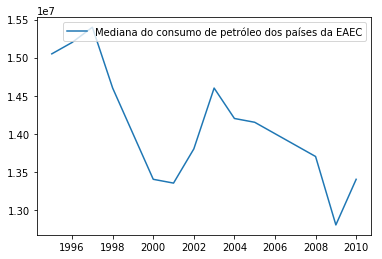

In [377]:
tabela_medianaaa.plot()

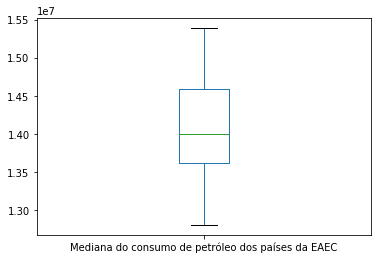

In [378]:
tabela_medianaaa.plot.box()

### Consumo de petróleo dos países não participantes da EAEC

In [379]:
consumo_oil_anos= consumo_oil.set_index('country')
# linhas2 = ['United States', 'South Korea', 'Japan', 'Canada', 'Switzerland', 'Mexico', 'Argentina', 'Armenia', 'Brazil', 'China', 'India', 'Pakistan', 'Russia', 'South Africa', 'Ukraine']
linhas2 = ['United States', 'South Korea', 'Japan', 'Canada', 'Switzerland', 'Mexico','Philippines', 'Argentina','Brazil', 'China', 'India', 'Pakistan', 'Russia', 'South Africa', 'Ukraine']
colunas2 = [1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010]
consumo_oil95_nue =consumo_oil_anos.loc[linhas2, colunas2]
v=consumo_oil95_nue.sort_values(by=2010, ascending=False)
v

,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010
country,,,,,,,,,,,,,,,,
United States,796000000,824000000,835000000,851000000,874000000,883000000,883000000,884000000,899000000,935000000,938000000,931000000,929000000,875000000,833000000,850000000
China,160000000,176000000,192000000,197000000,209000000,224000000,229000000,248000000,277000000,323000000,329000000,353000000,371000000,378000000,393000000,448000000
Japan,269000000,271000000,267000000,256000000,261000000,257000000,249000000,244000000,250000000,244000000,247000000,238000000,231000000,225000000,200000000,203000000
India,75200000,81100000,86500000,92500000,100000000,106000000,107000000,113000000,116000000,119000000,122000000,128000000,138000000,145000000,153000000,155000000
Russia,151000000,130000000,128000000,123000000,126000000,123000000,127000000,122000000,126000000,125000000,125000000,130000000,130000000,134000000,128000000,133000000
Brazil,82200000,87200000,92500000,95800000,96800000,94400000,96100000,95300000,92300000,96000000,99000000,100000000,107000000,116000000,117000000,127000000
South Korea,94800000,101000000,111000000,93900000,101000000,104000000,104000000,105000000,106000000,105000000,105000000,105000000,108000000,103000000,104000000,105000000
Canada,81100000,83500000,86700000,88600000,90000000,90100000,91300000,93800000,97400000,101000000,99600000,98700000,102000000,101000000,94400000,101000000
Mexico,74800000,76800000,79900000,84200000,84100000,88100000,86600000,82800000,85000000,88500000,90800000,89700000,92000000,91600000,88500000,88600000


In [380]:
mediana_oil_cons_neaec=v.median()
tabela_medianaaaa= pd.DataFrame(data=mediana_oil_cons_neaec, columns = ['Mediana do consumo de petróleo dos países fora da EAEC'])
tabela_medianaaaa
# v.describe()

,Mediana do consumo de petróleo dos países fora da EAEC
1995,75200000.0
1996,81100000.0
1997,86500000.0
1998,88600000.0
1999,90000000.0
2000,90100000.0
2001,91300000.0
2002,93800000.0
2003,92300000.0
2004,96000000.0


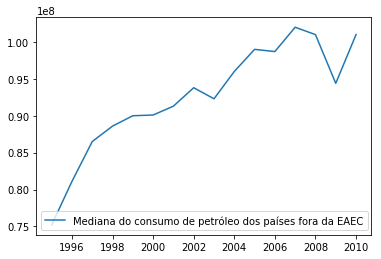

In [381]:
tabela_medianaaaa.plot()

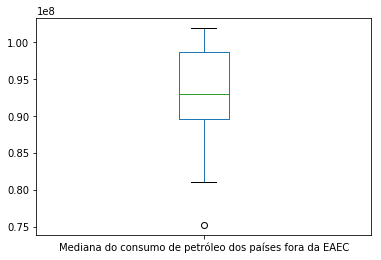

In [382]:
tabela_medianaaaa.plot.box()

### Produção de petróleo dos países participantes da EAEC

In [383]:
# prod_nuclear
# prod_nuclear_anos = prod_nuclear.set_index('country')
# linhas = ['Belgium','Bulgaria','Italy','Lithuania','Netherlands','Finland','Romania','France','Slovak Republic', 'Germany','Slovenia', 'Spain', 'Hungary','Sweden', 'United Kingdom']
# colunas = [1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011]
# producao_nuclear95_ue =prod_nuclear_anos.loc[linhas, colunas]
# producao_nuclear95_ue.sort_values(by=2011, ascending=False)

prod_oil
prod_oil_anos=prod_oil.set_index('country')
linhas = ['Denmark', 'Italy', 'Romania', 'United Kingdom']
colunas = [1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010]
prod_oil95_ue = prod_oil_anos.loc[linhas, colunas]
p=prod_oil95_ue.sort_values(by=2010, ascending=False)
p


,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010
country,,,,,,,,,,,,,,,,
United Kingdom,130000000.0,130000000.0,128000000.0,133000000.0,137000000.0,126000000.0,117000000.0,116000000.0,106000000.0,95600000.0,85100000.0,76900000.0,76900000.0,72000000.0,68300000.0,63200000.0
Denmark,9060000.0,10200000.0,11200000.0,11600000.0,14600000.0,17700000.0,17000000.0,18100000.0,17900000.0,19100000.0,18500000.0,16800000.0,15200000.0,14000000.0,12900000.0,12200000.0
Italy,5240000.0,5450000.0,5950000.0,5620000.0,5020000.0,4590000.0,4130000.0,5530000.0,5570000.0,5470000.0,6110000.0,5770000.0,5860000.0,5240000.0,4570000.0,5110000.0
Romania,6950000.0,6850000.0,6750000.0,6550000.0,6380000.0,6290000.0,6240000.0,6070000.0,5890000.0,5710000.0,5440000.0,5000000.0,4750000.0,4720000.0,4500000.0,4290000.0


In [384]:
# mediana_oil_cons_neaec=v.median()
# tabela_medianaaaa= pd.DataFrame(data=mediana_oil_cons_neaec, columns = ['Mediana do consumo de petróleo dos países fora da EAEC'])
# tabela_medianaaaa
# # v.describe()
prod_oil_eaec=p.median()
tab_mediana=pd.DataFrame(data=prod_oil_eaec, columns = ['Mediana da produção de petróleo dos países da EAEC'])
tab_mediana
# p.describe()



,Mediana da produção de petróleo dos países da EAEC
1995,8005000.0
1996,8525000.0
1997,8975000.0
1998,9075000.0
1999,10490000.0
2000,11995000.0
2001,11620000.0
2002,12085000.0
2003,11895000.0
2004,12405000.0


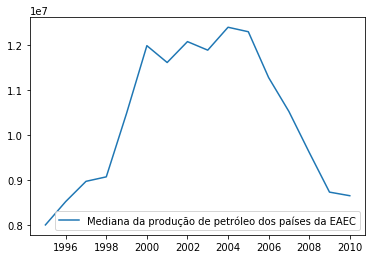

In [385]:
tab_mediana.plot()

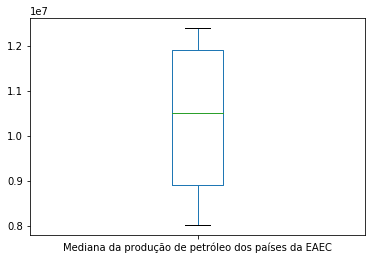

In [386]:
tab_mediana.plot.box()

### Produção de petróleo dos países não participantes da EAEC ###

In [387]:
prod_oil_anos=prod_oil.set_index('country')
linhas = ['United States', 'Canada', 'Mexico', 'Argentina', 'Brazil', 'China', 'India', 'Russia']
colunas = [1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010]
prod_oil95_nue = prod_oil_anos.loc[linhas, colunas]
g=prod_oil95_nue.sort_values(by=2010, ascending=False)
g

,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010
country,,,,,,,,,,,,,,,,
Russia,311000000.0,303000000.0,307000000.0,304000000.0,305000000.0,327000000.0,352000000.0,384000000.0,426000000.0,463000000.0,475000000.0,486000000.0,497000000.0,494000000.0,501000000.0,512000000.0
United States,384000000.0,382000000.0,380000000.0,368000000.0,353000000.0,348000000.0,345000000.0,342000000.0,333000000.0,325000000.0,309000000.0,305000000.0,305000000.0,302000000.0,322000000.0,333000000.0
China,149000000.0,159000000.0,160000000.0,160000000.0,160000000.0,163000000.0,165000000.0,167000000.0,170000000.0,174000000.0,181000000.0,185000000.0,186000000.0,190000000.0,189000000.0,203000000.0
Canada,112000000.0,115000000.0,121000000.0,125000000.0,121000000.0,125000000.0,126000000.0,133000000.0,140000000.0,145000000.0,142000000.0,151000000.0,155000000.0,153000000.0,153000000.0,160000000.0
Mexico,150000000.0,162000000.0,170000000.0,173000000.0,165000000.0,170000000.0,176000000.0,178000000.0,188000000.0,190000000.0,186000000.0,183000000.0,172000000.0,157000000.0,147000000.0,146000000.0
Brazil,37500000.0,42500000.0,45600000.0,52700000.0,59500000.0,67100000.0,70200000.0,78600000.0,81500000.0,80900000.0,89000000.0,94000000.0,95400000.0,99100000.0,106000000.0,112000000.0
India,36600000.0,34800000.0,35600000.0,34700000.0,34600000.0,34200000.0,34100000.0,35200000.0,35400000.0,36300000.0,34900000.0,36000000.0,36400000.0,37800000.0,38000000.0,41300000.0
Argentina,37500000.0,40800000.0,43400000.0,44000000.0,41700000.0,41400000.0,44000000.0,43300000.0,43200000.0,41100000.0,39400000.0,39500000.0,38300000.0,37800000.0,34000000.0,33300000.0


In [388]:
prod_oil_n_eaec=g.median()
tab_medianaa=pd.DataFrame(data=prod_oil_n_eaec, columns = ['Mediana da produção de petróleo dos países fora da EAEC'])


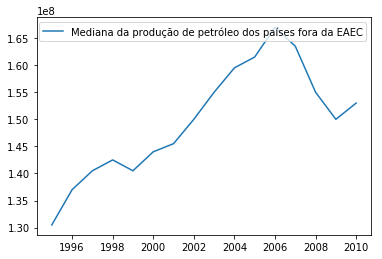

In [389]:
tab_medianaa.plot()

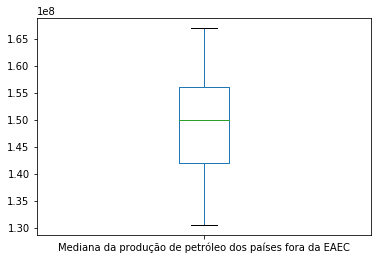

In [390]:
tab_medianaa.plot.box()

In [391]:
gdpp= gdp_ppp.set_index('country')
linhas = ['Belgium','Bulgaria','Lithuania','Netherlands','Finland','Romania','France','Slovak Republic', 'Germany','Slovenia', 'Spain', 'Hungary','Sweden', 'United Kingdom']
colunas = [1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010]
gdp_eaec=gdpp.loc[linhas, colunas]
gdp_eaec

,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010
country,,,,,,,,,,,,,,,,
Belgium,323000000000,327000000000,337000000000,344000000000,355000000000,369000000000,372000000000,378000000000,383000000000,396000000000,404000000000,4.150000e+11,4.260000e+11,4.300000e+11,4.170000e+11,4.260000e+11
Bulgaria,77200000000,70000000000,66300000000,69200000000,70900000000,74900000000,78200000000,82300000000,86100000000,92000000000,98000000000,1.040000e+11,1.110000e+11,1.180000e+11,1.110000e+11,1.120000e+11
Lithuania,35900000000,37400000000,39700000000,42300000000,41300000000,42700000000,45300000000,48300000000,52900000000,56700000000,60900000000,6.570000e+10,7.220000e+10,7.420000e+10,6.320000e+10,6.490000e+10
Netherlands,497000000000,517000000000,541000000000,564000000000,591000000000,615000000000,628000000000,630000000000,635000000000,652000000000,665000000000,6.900000e+11,7.180000e+11,7.310000e+11,7.030000e+11,7.130000e+11
Finland,134000000000,140000000000,148000000000,157000000000,163000000000,171000000000,175000000000,178000000000,181000000000,188000000000,194000000000,2.030000e+11,2.140000e+11,2.140000e+11,1.960000e+11,2.030000e+11
Romania,264000000000,274000000000,257000000000,244000000000,240000000000,245000000000,258000000000,270000000000,282000000000,306000000000,317000000000,3.420000e+11,3.630000e+11,3.890000e+11,3.630000e+11,3.590000e+11
France,1780000000000,1800000000000,1840000000000,1900000000000,1960000000000,2040000000000,2080000000000,2100000000000,2110000000000,2160000000000,2180000000000,2.230000e+12,2.280000e+12,2.280000e+12,2.210000e+12,2.250000e+12
Slovak Republic,71200000000,76200000000,80600000000,83600000000,83900000000,84600000000,87300000000,90900000000,94800000000,99900000000,106000000000,1.150000e+11,1.270000e+11,1.350000e+11,1.280000e+11,1.330000e+11
Germany,2690000000000,2720000000000,2770000000000,2820000000000,2870000000000,2960000000000,2990000000000,2990000000000,2990000000000,3020000000000,3040000000000,3.170000e+12,3.280000e+12,3.310000e+12,3.150000e+12,3.270000e+12


In [392]:
consumo_oil.set_index('country', inplace=True)

In [393]:
consumo_oil = consumo_oil.loc[linhas, colunas]

C:\Users\Vitor Bandeira\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  """Entry point for launching an IPython kernel.


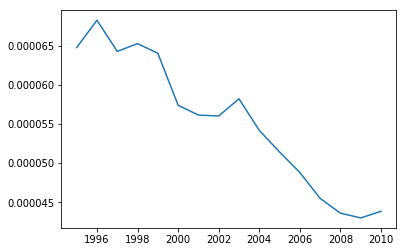

In [394]:
t=consumo_oil.median()
g=gdp_eaec.median()
f=t/g
f.plot()


In [395]:
gdp_eaec_mediana
consumo_oil

,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010
country,,,,,,,,,,,,,,,,
Belgium,27700000.0,30200000.0,31000000.0,31300000.0,30100000.0,30900000.0,31000000.0,31700000.0,33700000.0,33700000.0,33600000.0,33800000.0,34600000.0,36000000.0,31500000.0,32700000.0
Bulgaria,4870000.0,4290000.0,4250000.0,4430000.0,4120000.0,4110000.0,4220000.0,4220000.0,4420000.0,4300000.0,4830000.0,4970000.0,4840000.0,4770000.0,4290000.0,3890000.0
Lithuania,3170000.0,3300000.0,3260000.0,3760000.0,3090000.0,2370000.0,2740000.0,2530000.0,2420000.0,2600000.0,2780000.0,2810000.0,2790000.0,3060000.0,2630000.0,2700000.0
Netherlands,38700000.0,38300000.0,40300000.0,40500000.0,41500000.0,42700000.0,44800000.0,44700000.0,45100000.0,47100000.0,50100000.0,50800000.0,50700000.0,47300000.0,45900000.0,45900000.0
Finland,10200000.0,10400000.0,10300000.0,10800000.0,10900000.0,10900000.0,10700000.0,11100000.0,11500000.0,10700000.0,11100000.0,10700000.0,10800000.0,10700000.0,10100000.0,10600000.0
Romania,13500000.0,13000000.0,13700000.0,12000000.0,9480000.0,9980000.0,10600000.0,10600000.0,9430000.0,10900000.0,10500000.0,10300000.0,10300000.0,10400000.0,9190000.0,8750000.0
France,89000000.0,91000000.0,91700000.0,95000000.0,96400000.0,94900000.0,95500000.0,92900000.0,93100000.0,94000000.0,93100000.0,93000000.0,91400000.0,90800000.0,87500000.0,84500000.0
Slovak Republic,3240000.0,3400000.0,3390000.0,3790000.0,3430000.0,3410000.0,3190000.0,3540000.0,3330000.0,3180000.0,3830000.0,3430000.0,3630000.0,3940000.0,3730000.0,3920000.0
Germany,135000000.0,137000000.0,136000000.0,137000000.0,132000000.0,130000000.0,132000000.0,127000000.0,125000000.0,124000000.0,122000000.0,124000000.0,112000000.0,119000000.0,114000000.0,115000000.0


In [396]:
stack_consumo_oil = consumo_oil.stack()
stack_gdp_eaec = gdp_eaec.stack()

In [397]:
dataf_consumo_gdp_eaec = pd.DataFrame({'GDP': stack_gdp_eaec, 'Consumo petrólio': stack_consumo_oil})
dataf_consumo_gdp_eaec

GDP  Consumo petrólio
country                                            
Belgium        1995  3.230000e+11        27700000.0
               1996  3.270000e+11        30200000.0
               1997  3.370000e+11        31000000.0
               1998  3.440000e+11        31300000.0
               1999  3.550000e+11        30100000.0
               2000  3.690000e+11        30900000.0
               2001  3.720000e+11        31000000.0
               2002  3.780000e+11        31700000.0
               2003  3.830000e+11        33700000.0
               2004  3.960000e+11        33700000.0
               2005  4.040000e+11        33600000.0
               2006  4.150000e+11        33800000.0
               2007  4.260000e+11        34600000.0
               2008  4.300000e+11        36000000.0
               2009  4.170000e+11        31500000.0
               2010  4.260000e+11        32700000.0
Bulgaria       1995  7.720000e+10         4870000.0
               1996  7.000000e+10         4290000.0
               1997  6.630000e+10         4250000.0
               1998  6.920000e+10         4430000.0
               1999  7.090000e+10         4120000.0
               2000  7.490000e+10         4110000.0
               2001  7.820000e+10         4220000.0
               2002  8.230000e+10         4220000.0
               2003  8.610000e+10         4420000.0
               2004  9.200000e+10         4300000.0
               2005  9.800000e+10         4830000.0
               2006  1.040000e+11         4970000.0
               2007  1.110000e+11         4840000.0
               2008  1.180000e+11         4770000.0
...                           ...               ...
Sweden         1997  2.750000e+11        17100000.0
               1998  2.830000e+11        17200000.0
               1999  2.940000e+11        17100000.0
               2000  3.090000e+11        15900000.0
               2001  3.120000e+11        16000000.0
               2002  3.190000e+11        16500000.0
               2003  3.260000e+11        17700000.0
               2004  3.400000e+11        17500000.0
               2005  3.520000e+11        17200000.0
               2006  3.670000e+11        17300000.0
               2007  3.800000e+11        16900000.0
               2008  3.770000e+11        16700000.0
               2009  3.580000e+11        15500000.0
               2010  3.800000e+11        16200000.0
United Kingdom 1995  1.530000e+12        82200000.0
               1996  1.580000e+12        84200000.0
               1997  1.630000e+12        81700000.0
               1998  1.690000e+12        81200000.0
               1999  1.760000e+12        79900000.0
               2000  1.830000e+12        78800000.0
               2001  1.890000e+12        78700000.0
               2002  1.940000e+12        78200000.0
               2003  2.010000e+12        78700000.0
               2004  2.070000e+12        81000000.0
               2005  2.110000e+12        83800000.0
               2006  2.170000e+12        83200000.0
               2007  2.240000e+12        80700000.0
               2008  2.210000e+12        79500000.0
               2009  2.120000e+12        75800000.0
               2010  2.150000e+12        74900000.0

[224 rows x 2 columns]

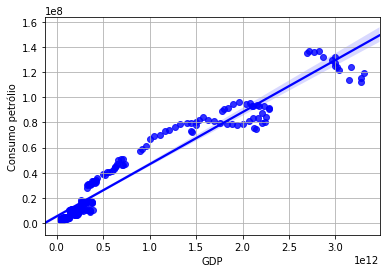

Correlação: 0.9697816711562737



In [398]:
# dataf_consumo_gdp_eaec.plot.scatter('GDP', 'Consumo petrólio')
correlation=dataf_consumo_gdp_eaec.corr()
sns.regplot(dataf_consumo_gdp_eaec['GDP'], dataf_consumo_gdp_eaec['Consumo petrólio'], color=('blue'))
plt.grid()
plt.show()
print("Correlação: {}\n".format(correlation['GDP']['Consumo petrólio']))

In [399]:
# ano=consumo_oil.transpose()
# l = [1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010]
# c = [country]
# consumo_oilanos =ano.loc[l, c]
# consumo_oilanos
    

In [400]:
# fazer grafico de petroleo/gdp por ano

In [401]:
oilporgdp=stack_consumo_oil/stack_gdp_eaec
oilporgdp
dataf_oil_por_gdp_ano = pd.DataFrame({'Petróleo/GDP': oilporgdp})
dataf_oil_por_gdp_ano

Petróleo/GDP
country                          
Belgium        1995      0.000086
               1996      0.000092
               1997      0.000092
               1998      0.000091
               1999      0.000085
               2000      0.000084
               2001      0.000083
               2002      0.000084
               2003      0.000088
               2004      0.000085
               2005      0.000083
               2006      0.000081
               2007      0.000081
               2008      0.000084
               2009      0.000076
               2010      0.000077
Bulgaria       1995      0.000063
               1996      0.000061
               1997      0.000064
               1998      0.000064
               1999      0.000058
               2000      0.000055
               2001      0.000054
               2002      0.000051
               2003      0.000051
               2004      0.000047
               2005      0.000049
               2006      0.000048
               2007      0.000044
               2008      0.000040
...                           ...
Sweden         1997      0.000062
               1998      0.000061
               1999      0.000058
               2000      0.000051
               2001      0.000051
               2002      0.000052
               2003      0.000054
               2004      0.000051
               2005      0.000049
               2006      0.000047
               2007      0.000044
               2008      0.000044
               2009      0.000043
               2010      0.000043
United Kingdom 1995      0.000054
               1996      0.000053
               1997      0.000050
               1998      0.000048
               1999      0.000045
               2000      0.000043
               2001      0.000042
               2002      0.000040
               2003      0.000039
               2004      0.000039
               2005      0.000040
               2006      0.000038
               2007      0.000036
               2008      0.000036
               2009      0.000036
               2010      0.000035

[224 rows x 1 columns]

In [402]:
dataf_consumo_gdp_eaec

GDP  Consumo petrólio
country                                            
Belgium        1995  3.230000e+11        27700000.0
               1996  3.270000e+11        30200000.0
               1997  3.370000e+11        31000000.0
               1998  3.440000e+11        31300000.0
               1999  3.550000e+11        30100000.0
               2000  3.690000e+11        30900000.0
               2001  3.720000e+11        31000000.0
               2002  3.780000e+11        31700000.0
               2003  3.830000e+11        33700000.0
               2004  3.960000e+11        33700000.0
               2005  4.040000e+11        33600000.0
               2006  4.150000e+11        33800000.0
               2007  4.260000e+11        34600000.0
               2008  4.300000e+11        36000000.0
               2009  4.170000e+11        31500000.0
               2010  4.260000e+11        32700000.0
Bulgaria       1995  7.720000e+10         4870000.0
               1996  7.000000e+10         4290000.0
               1997  6.630000e+10         4250000.0
               1998  6.920000e+10         4430000.0
               1999  7.090000e+10         4120000.0
               2000  7.490000e+10         4110000.0
               2001  7.820000e+10         4220000.0
               2002  8.230000e+10         4220000.0
               2003  8.610000e+10         4420000.0
               2004  9.200000e+10         4300000.0
               2005  9.800000e+10         4830000.0
               2006  1.040000e+11         4970000.0
               2007  1.110000e+11         4840000.0
               2008  1.180000e+11         4770000.0
...                           ...               ...
Sweden         1997  2.750000e+11        17100000.0
               1998  2.830000e+11        17200000.0
               1999  2.940000e+11        17100000.0
               2000  3.090000e+11        15900000.0
               2001  3.120000e+11        16000000.0
               2002  3.190000e+11        16500000.0
               2003  3.260000e+11        17700000.0
               2004  3.400000e+11        17500000.0
               2005  3.520000e+11        17200000.0
               2006  3.670000e+11        17300000.0
               2007  3.800000e+11        16900000.0
               2008  3.770000e+11        16700000.0
               2009  3.580000e+11        15500000.0
               2010  3.800000e+11        16200000.0
United Kingdom 1995  1.530000e+12        82200000.0
               1996  1.580000e+12        84200000.0
               1997  1.630000e+12        81700000.0
               1998  1.690000e+12        81200000.0
               1999  1.760000e+12        79900000.0
               2000  1.830000e+12        78800000.0
               2001  1.890000e+12        78700000.0
               2002  1.940000e+12        78200000.0
               2003  2.010000e+12        78700000.0
               2004  2.070000e+12        81000000.0
               2005  2.110000e+12        83800000.0
               2006  2.170000e+12        83200000.0
               2007  2.240000e+12        80700000.0
               2008  2.210000e+12        79500000.0
               2009  2.120000e+12        75800000.0
               2010  2.150000e+12        74900000.0

[224 rows x 2 columns]

In [403]:
dataf_consumo_gdp_eaec

GDP  Consumo petrólio
country                                            
Belgium        1995  3.230000e+11        27700000.0
               1996  3.270000e+11        30200000.0
               1997  3.370000e+11        31000000.0
               1998  3.440000e+11        31300000.0
               1999  3.550000e+11        30100000.0
               2000  3.690000e+11        30900000.0
               2001  3.720000e+11        31000000.0
               2002  3.780000e+11        31700000.0
               2003  3.830000e+11        33700000.0
               2004  3.960000e+11        33700000.0
               2005  4.040000e+11        33600000.0
               2006  4.150000e+11        33800000.0
               2007  4.260000e+11        34600000.0
               2008  4.300000e+11        36000000.0
               2009  4.170000e+11        31500000.0
               2010  4.260000e+11        32700000.0
Bulgaria       1995  7.720000e+10         4870000.0
               1996  7.000000e+10         4290000.0
               1997  6.630000e+10         4250000.0
               1998  6.920000e+10         4430000.0
               1999  7.090000e+10         4120000.0
               2000  7.490000e+10         4110000.0
               2001  7.820000e+10         4220000.0
               2002  8.230000e+10         4220000.0
               2003  8.610000e+10         4420000.0
               2004  9.200000e+10         4300000.0
               2005  9.800000e+10         4830000.0
               2006  1.040000e+11         4970000.0
               2007  1.110000e+11         4840000.0
               2008  1.180000e+11         4770000.0
...                           ...               ...
Sweden         1997  2.750000e+11        17100000.0
               1998  2.830000e+11        17200000.0
               1999  2.940000e+11        17100000.0
               2000  3.090000e+11        15900000.0
               2001  3.120000e+11        16000000.0
               2002  3.190000e+11        16500000.0
               2003  3.260000e+11        17700000.0
               2004  3.400000e+11        17500000.0
               2005  3.520000e+11        17200000.0
               2006  3.670000e+11        17300000.0
               2007  3.800000e+11        16900000.0
               2008  3.770000e+11        16700000.0
               2009  3.580000e+11        15500000.0
               2010  3.800000e+11        16200000.0
United Kingdom 1995  1.530000e+12        82200000.0
               1996  1.580000e+12        84200000.0
               1997  1.630000e+12        81700000.0
               1998  1.690000e+12        81200000.0
               1999  1.760000e+12        79900000.0
               2000  1.830000e+12        78800000.0
               2001  1.890000e+12        78700000.0
               2002  1.940000e+12        78200000.0
               2003  2.010000e+12        78700000.0
               2004  2.070000e+12        81000000.0
               2005  2.110000e+12        83800000.0
               2006  2.170000e+12        83200000.0
               2007  2.240000e+12        80700000.0
               2008  2.210000e+12        79500000.0
               2009  2.120000e+12        75800000.0
               2010  2.150000e+12        74900000.0

[224 rows x 2 columns]

In [429]:
x
stack_prod_nuclear = x.stack()
stack_gdp_eaec = gdp_eaec.stack()

In [430]:
dataf_prodnuc_gdp_eaec = pd.DataFrame({'GDP': stack_gdp_eaec, 'Produção nuclear': stack_prod_nuclear})

In [431]:
dataf_prodnuc_gdp_eaec

GDP  Produção nuclear
country                                            
Belgium        1995  3.230000e+11         3560000.0
               1996  3.270000e+11         3730000.0
               1997  3.370000e+11         4080000.0
               1998  3.440000e+11         3970000.0
               1999  3.550000e+11         4220000.0
               2000  3.690000e+11         4140000.0
               2001  3.720000e+11         3990000.0
               2002  3.780000e+11         4070000.0
               2003  3.830000e+11         4070000.0
               2004  3.960000e+11         4070000.0
               2005  4.040000e+11         4090000.0
               2006  4.150000e+11         4010000.0
               2007  4.260000e+11         4150000.0
               2008  4.300000e+11         3920000.0
               2009  4.170000e+11         4060000.0
               2010  4.260000e+11         4120000.0
Bulgaria       1995  7.720000e+10         1480000.0
               1996  7.000000e+10         1560000.0
               1997  6.630000e+10         1530000.0
               1998  6.920000e+10         1450000.0
               1999  7.090000e+10         1360000.0
               2000  7.490000e+10         1560000.0
               2001  7.820000e+10         1680000.0
               2002  8.230000e+10         1740000.0
               2003  8.610000e+10         1490000.0
               2004  9.200000e+10         1450000.0
               2005  9.800000e+10         1600000.0
               2006  1.040000e+11         1680000.0
               2007  1.110000e+11         1260000.0
               2008  1.180000e+11         1360000.0
...                           ...               ...
Sweden         1997  2.750000e+11         6010000.0
               1998  2.830000e+11         6330000.0
               1999  2.940000e+11         6290000.0
               2000  3.090000e+11         4930000.0
               2001  3.120000e+11         6200000.0
               2002  3.190000e+11         5860000.0
               2003  3.260000e+11         5800000.0
               2004  3.400000e+11         6660000.0
               2005  3.520000e+11         6220000.0
               2006  3.670000e+11         5760000.0
               2007  3.800000e+11         5760000.0
               2008  3.770000e+11         5490000.0
               2009  3.580000e+11         4490000.0
               2010  3.800000e+11         4970000.0
United Kingdom 1995  1.530000e+12         7650000.0
               1996  1.580000e+12         8140000.0
               1997  1.630000e+12         8440000.0
               1998  1.690000e+12         8550000.0
               1999  1.760000e+12         8180000.0
               2000  1.830000e+12         7310000.0
               2001  1.890000e+12         7750000.0
               2002  1.940000e+12         7550000.0
               2003  2.010000e+12         7630000.0
               2004  2.070000e+12         6880000.0
               2005  2.110000e+12         7020000.0
               2006  2.170000e+12         6490000.0
               2007  2.240000e+12         5420000.0
               2008  2.210000e+12         4510000.0
               2009  2.120000e+12         5940000.0
               2010  2.150000e+12         5340000.0

[224 rows x 2 columns]

C:\Users\Vitor Bandeira\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


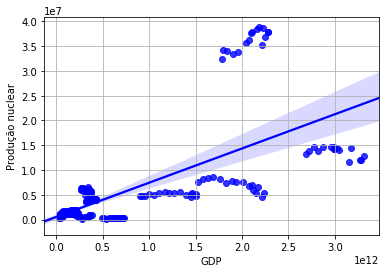

Correlação: 0.6852452854476144



In [432]:
correlationn=dataf_prodnuc_gdp_eaec.corr()
sns.regplot(dataf_prodnuc_gdp_eaec['GDP'], dataf_prodnuc_gdp_eaec['Produção nuclear'], color=('blue'))
plt.grid()
plt.show()
print("Correlação: {}\n".format(correlationn['GDP']['Produção nuclear']))

In [408]:
mediana_nuclear_prod_eaec=x.median()
tabela_mediana_= pd.DataFrame(data=mediana_nuclear_prod_eaec, columns = ['Mediana da produção nuclear dos países da EAEC'])
tabela_mediana_
# x.describe()

,Mediana da produção nuclear dos países da EAEC
1995,1650000.0
1996,1620000.0
1997,1665000.0
1998,1665000.0
1999,1670000.0
2000,1745000.0
2001,1820000.0
2002,1830000.0
2003,1750000.0
2004,1705000.0


In [409]:
gdp_eaec_mediana=gdp_eaec.median()
tabela_mediana_gdp = pd.DataFrame(data=gdp_eaec_mediana, columns = ['Mediana da GDP dos países da EAEC'])
tabela_mediana_gdp

,Mediana da GDP dos países da EAEC
1995,2.640000e+11
1996,2.710000e+11
1997,2.660000e+11
1998,2.635000e+11
1999,2.670000e+11
2000,2.770000e+11
2001,2.850000e+11
2002,2.945000e+11
2003,3.040000e+11
2004,3.230000e+11


In [410]:
b = tabela_mediana_gdp.join(tab_mediana)
b

,Mediana da GDP dos países da EAEC,Mediana da produção de petróleo dos países da EAEC
1995,2.640000e+11,8005000.0
1996,2.710000e+11,8525000.0
1997,2.660000e+11,8975000.0
1998,2.635000e+11,9075000.0
1999,2.670000e+11,10490000.0
2000,2.770000e+11,11995000.0
2001,2.850000e+11,11620000.0
2002,2.945000e+11,12085000.0
2003,3.040000e+11,11895000.0
2004,3.230000e+11,12405000.0


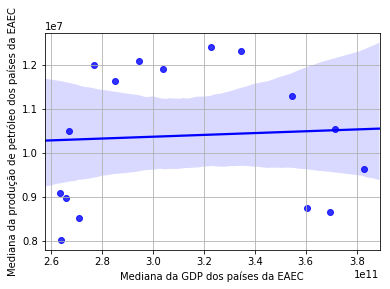

Correlação: 0.05852271568627498



In [411]:
corre=b.corr()

sns.regplot(b['Mediana da GDP dos países da EAEC'], b['Mediana da produção de petróleo dos países da EAEC'], color=('blue'))
# plt.xlabel('Prod. energia nuclear dos países da EAEC')
# plt.xlabel('Consumo petróleo dos países da EAEC')
plt.grid()
plt.show()
print("Correlação: {}\n".format(corre['Mediana da GDP dos países da EAEC']['Mediana da produção de petróleo dos países da EAEC']))

In [412]:
q = tabela_mediana_gdp.join(tabela_medianaaa, lsuffix='Energia Nuclear', rsuffix='Petróleo')
q

,Mediana da GDP dos países da EAEC,Mediana do consumo de petróleo dos países da EAEC
1995,2.640000e+11,15050000.0
1996,2.710000e+11,15200000.0
1997,2.660000e+11,15400000.0
1998,2.635000e+11,14600000.0
1999,2.670000e+11,14000000.0
2000,2.770000e+11,13400000.0
2001,2.850000e+11,13350000.0
2002,2.945000e+11,13800000.0
2003,3.040000e+11,14600000.0
2004,3.230000e+11,14200000.0


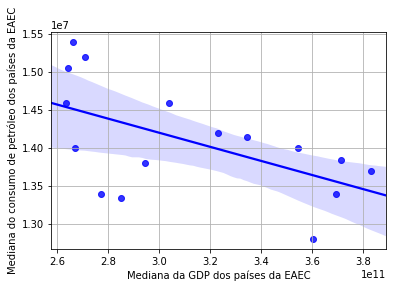

Correlação: -0.5662211640056929



In [413]:
correl=q.corr()

sns.regplot(q['Mediana da GDP dos países da EAEC'], q['Mediana do consumo de petróleo dos países da EAEC'], color=('blue'))
# plt.xlabel('Prod. energia nuclear dos países da EAEC')
# plt.xlabel('Consumo petróleo dos países da EAEC')
plt.grid()
plt.show()
print("Correlação: {}\n".format(correl['Mediana da GDP dos países da EAEC']['Mediana do consumo de petróleo dos países da EAEC']))

###  Comparações / Conclusão:

In [414]:
tabi=tabela_medianaaa/10
df = tabela_mediana_.join(tabi, lsuffix='Energia Nuclear', rsuffix='Petróleo')
df


,Mediana da produção nuclear dos países da EAEC,Mediana do consumo de petróleo dos países da EAEC
1995,1650000.0,1505000.0
1996,1620000.0,1520000.0
1997,1665000.0,1540000.0
1998,1665000.0,1460000.0
1999,1670000.0,1400000.0
2000,1745000.0,1340000.0
2001,1820000.0,1335000.0
2002,1830000.0,1380000.0
2003,1750000.0,1460000.0
2004,1705000.0,1420000.0


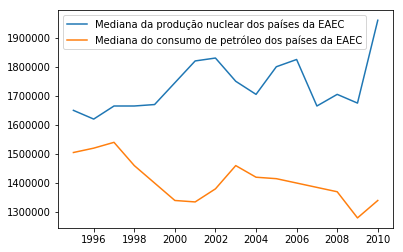

In [415]:
df.plot()
# df.set(xlabel="x label", ylabel="y label")


Unidades do gráfico: X: Anos Y: Toneladas de petróleo

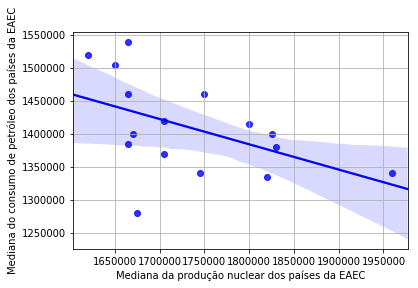

Correlação: -0.4823166754370872



In [416]:
cor=df.corr()

sns.regplot(df['Mediana da produção nuclear dos países da EAEC'], df['Mediana do consumo de petróleo dos países da EAEC'], color=('blue'))
# plt.xlabel('Prod. energia nuclear dos países da EAEC')
# plt.xlabel('Consumo petróleo dos países da EAEC')
plt.grid()
plt.show()
print("Correlação: {}\n".format(cor['Mediana da produção nuclear dos países da EAEC']['Mediana do consumo de petróleo dos países da EAEC']))

***É valido para tirar alguma conclusão?***
analise com gdp

In [417]:
df[['Mediana da produção nuclear dos países da EAEC', 'Mediana do consumo de petróleo dos países da EAEC']].cov()

,Mediana da produção nuclear dos países da EAEC,Mediana do consumo de petróleo dos países da EAEC
Mediana da produção nuclear dos países da EAEC,8.286250e+09,-3.182083e+09
Mediana do consumo de petróleo dos países da EAEC,-3.182083e+09,5.252917e+09


In [418]:

df[['Mediana da produção nuclear dos países da EAEC', 'Mediana do consumo de petróleo dos países da EAEC']].corr()
#talves se analisar uma janela de dados  maior (mais anos) o correlação aumente?

,Mediana da produção nuclear dos países da EAEC,Mediana do consumo de petróleo dos países da EAEC
Mediana da produção nuclear dos países da EAEC,1.000000,-0.482317
Mediana do consumo de petróleo dos países da EAEC,-0.482317,1.000000


,Mediana do consumo de petróleo dos países fora da EAEC,Mediana do consumo de petróleo dos países da EAEC
1995,7520000.0,15050000.0
1996,8110000.0,15200000.0
1997,8650000.0,15400000.0
1998,8860000.0,14600000.0
1999,9000000.0,14000000.0
2000,9010000.0,13400000.0
2001,9130000.0,13350000.0
2002,9380000.0,13800000.0
2003,9230000.0,14600000.0
2004,9600000.0,14200000.0


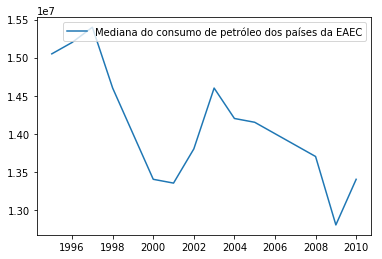

In [419]:
tabela_medianaaa.plot()
oil_cons = tabela_medianaaaa.join(tabela_medianaaa, lsuffix='Energia Nuclear', rsuffix='Petróleo')
oil_cons
# tbaaaa=tabela_medianaaaa/10
# tbaaaa.plot()
oil_cons = tbaaaa.join(tabela_medianaaa, lsuffix='Energia Nuclear', rsuffix='Petróleo')
oil_cons

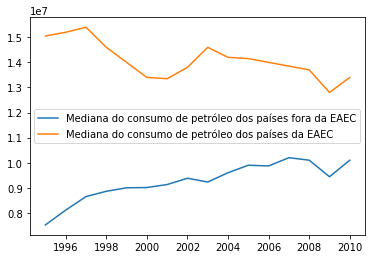

In [420]:
oil_cons.plot()

In [423]:
cor_=oil.corr()

sns.regplot(oil['Mediana do consumo de petróleo dos países fora da EAEC'], oil['Mediana do consumo de petróleo dos países da EAEC'])
# plt.xlabel('Consumo pet. dos países fora da EAEC')
# plt.ylabel('Consumo pet. dos países da EAEC')
plt.grid()
plt.show()
print("Correlação: {}\n".format(cor_['Mediana do consumo de petróleo dos países fora da EAEC']['Mediana do consumo de petróleo dos países da EAEC']))

NameError: name 'oil' is not defined

In [424]:
oil[['Mediana do consumo de petróleo dos países fora da EAEC', 'Mediana do consumo de petróleo dos países da EAEC']].cov()

NameError: name 'oil' is not defined

In [425]:
oil[['Mediana do consumo de petróleo dos países fora da EAEC', 'Mediana do consumo de petróleo dos países da EAEC']].corr()

NameError: name 'oil' is not defined

In [ ]:
# plt.subplot(132)
# hic  = tabela_mediana_["Mediana da prod. de energia nuclear dos países da EAEC"].plot.box()
# plt.title('Produção de energia nuclear EAEC.')
# plt.xlabel('Anos')
# plt.ylabel('Tonelada equivalente de petróleo (toe)')
# plt.grid()
# plt.tight_layout()

# plt.subplot(132)
# hic  = tabela_mediana["Mediana da prod. de energia nuclear dos países fora da EAEC"].plot.box()
# plt.title('Produção de energia nuclear dos países fora da EAEC.')
# plt.xlabel('Anos')
# plt.ylabel('Tonelada equivalente de petróleo')
# plt.grid()
# plt.tight_layout()